In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
size = 249
target_size = (size,size,3)

In [ ]:
train_datagen1 = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

train_gen1 = train_datagen1.flow_from_directory('/content/drive/MyDrive/Task_A/train',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 1926 images belonging to 2 classes.


In [ ]:
test_datagen1 = ImageDataGenerator(rescale=1./255)

test_gen1 = test_datagen1.flow_from_directory('/content/drive/MyDrive/Task_A/val',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

Found 422 images belonging to 2 classes.


In [ ]:
#base
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())
#head
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,177,513 (103.67 MB)

 Trainable params: 6,305,793 (24.05 MB)

 Non-trainable params: 20,871,720 (79.62 MB)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [ ]:
epochs = 12
batch_size=256
history1 = model.fit(train_gen1, epochs= epochs, validation_data= test_gen1,
                    validation_steps= len(test_gen1.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9173 - loss: 0.2365 - val_accuracy: 0.7812 - val_loss: 0.5096
Epoch 2/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 62s 690ms/step - accuracy: 0.9228 - loss: 0.2098 - val_accuracy: 0.8438 - val_loss: 0.3744
Epoch 3/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 689ms/step - accuracy: 0.9144 - loss: 0.2321 - val_accuracy: 0.7500 - val_loss: 0.5148
Epoch 4/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 690ms/step - accuracy: 0.9152 - loss: 0.2142 - val_accuracy: 0.9375 - val_loss: 0.2212
Epoch 5/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9207 - loss: 0.2055 - val_accuracy: 0.8438 - val_loss: 0.4572
Epoch 6/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9272 - loss: 0.2082 - val_accuracy: 0.9062 - val_loss: 0.2709
Epoch 7/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 722ms/step - accuracy: 0.9206 - loss: 0.1853 - val_accuracy: 0.7812 - val_loss: 0.5636
Epoch 8/12
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9361 - loss: 0.1633 - val_accuracy: 0.90

<Figure size 640x480 with 0 Axes>

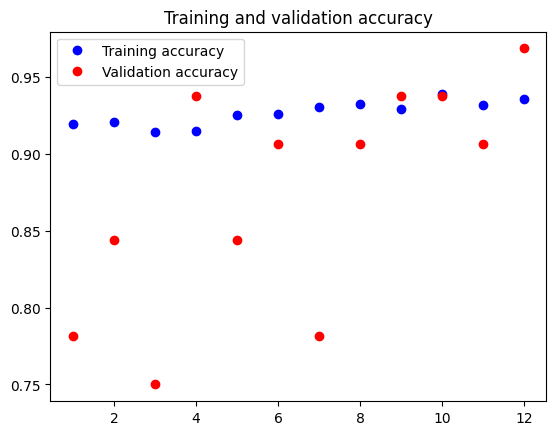

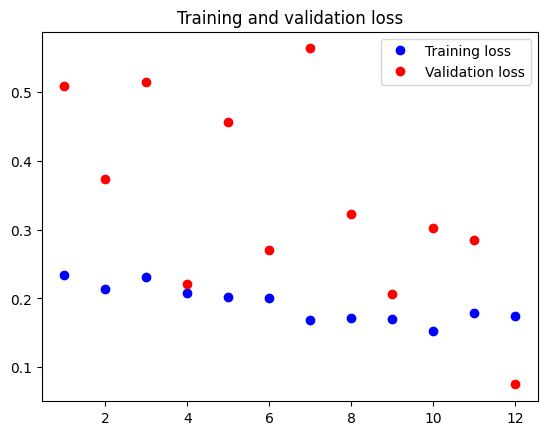

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [ ]:
test_loss, test_acc = model.evaluate(test_gen1)
print('test acc:', test_acc)
print('test_loss:',test_loss)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9127 - loss: 0.3057
test acc: 0.9123222827911377
test_loss: 0.3004132807254791
